<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Brutyan%20Ruben/2_1_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C(%D1%81_VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПОДГОТОВКА - train_val_test

## Загрузка библиотек

In [ ]:
# Для работы с файлами
import os

from tensorflow.keras.models import Sequential                                                                 # абстрактный класс базовой модели сети от кераса
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Flatten  # слои(нормализации, регуляризации и т.д)
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils

import matplotlib.pyplot as plt     # для создания графиков и визуализаций в Python
import random                       # для генерации случайных чисел
from PIL import Image               # методы для отрисовки изображений, обработки и манипулирования изображениями

## Создание папок

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Папки для 2-х классов цветных изображений (0 - комбинированные, 1 - металл, 2 - пластик)

In [ ]:
!pwd   # проверяем текущее местоположение

/content


In [ ]:
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/'           # создаём папку Dataset
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/train'      # создаём папку train - обучающие фото
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/test'       # создаём папку test - тестовые фото

mkdir: cannot create directory ‘/content/drive/MyDrive/НетОптик/Dataset/’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/НетОптик/Dataset/train’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/НетОптик/Dataset/test’: File exists


## Статистика (кол-во)

Количество и метки классов. Названия файлов.

In [ ]:
# Для работы с файлами
import os

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/drive/MyDrive/НетОптик/Dataset/train'
print('Список подпапок:', os.listdir(IMAGE_PATH), '\n')

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Метки классов: {CLASS_LIST}')
print(f'Количество классов: {CLASS_COUNT}\n')


# Получения списка файлов для каждого класса
for name_folder in CLASS_LIST:
  file_name = os.listdir(f'{IMAGE_PATH}/{name_folder}/')
  print(f'В папке "{name_folder}" всего {len(file_name)} картинок:\n{file_name}\n')

Список подпапок: ['class_1p', 'class_2m'] 

Метки классов: ['class_1p', 'class_2m']
Количество классов: 2

В папке "class_1p" всего 400 картинок:
['baldessarini-b5103-b-s2-2 (1).jpg', 'baldessarini-b5103-b-s2-1 (2).jpg', 'carrera-ca6167-t29-s2-2 (1).jpg', 'carrera-ca6172-87u-s2-2 (5).jpg', 'carrera-ca6172-87u-s2-2 (6).jpg', 'carrera-ca6192-8c0-s2-2 (5).jpg', 'carrera-ca6609-dhr-s2-2 (1).jpg', 'carrera-ca6167-t29-s2-1 (2).jpg', 'carrera-ca6609-dhr-s2-1 (2).jpg', 'giorgio-armani-ga889-807-s2-2 (2).jpg', 'giorgio-armani-ga936-086-s2-2 (2).jpg', 'giorgio-armani-ga936-086-s2-1 (3).jpg', 'giorgio-armani-ga936-807-s2-2 (3).jpg', 'giorgio-armani-ga936-807-s2-1 (4).jpg', 'giorgio-armani-ga938-807-s2-2 (2).jpg', 'giorgio-armani-ga938-807-s2-1 (3).jpg', 'giorgio-armani-ga941-086-s2-2 (2).jpg', 'giorgio-armani-ga941-086-s2-1 (3).jpg', 'giorgio-armani-ga965-7c5-s2-2 (2).jpg', 'giorgio-armani-ga965-7c5-s2-1 (3).jpg', 'giorgio-armani-ga970-807-s2-2 (2).jpg', 'giorgio-armani-ga970-807-s2-1 (3).jpg', '

## Вывод изображений

Вывод по одному случайному изображению из каждого класса

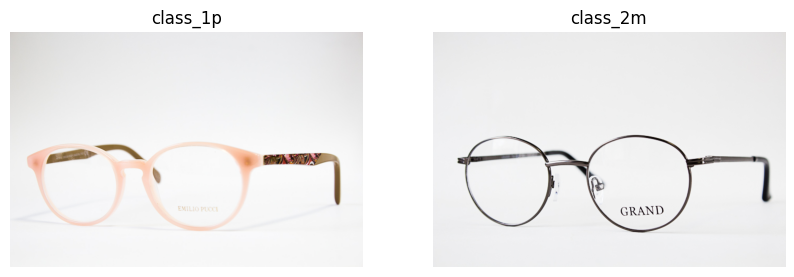

In [ ]:
import matplotlib.pyplot as plt     # для создания графиков и визуализаций в Python
import random                       # для генерации случайных чисел
from PIL import Image               # методы для отрисовки изображений, обработки и манипулирования изображениями

# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    class_path = f'{IMAGE_PATH}/{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = class_path + random.choice(os.listdir(class_path))

    # Отображение фотографии
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

# НАЧАЛЬНЫЕ данные

## Загрузка параметров

In [ ]:
# Параметры для ImageDataGenerator

batch_size = 32
img_height = 675
img_width = 450
data_dir = '/content/drive/MyDrive/НетОптик/Dataset/train'
test_dir = '/content/drive/MyDrive/НетОптик/Dataset/test'

# Размерность тензора на основе изображения для входных данных в нейронную сеть
input_shape = (img_width, img_height, 3)              # выбираем вид backend Tensorflow, channels_last

# Загрузка и подготовка изображений

**ImageDataGenerator** - это класс в библиотеке Keras, который используется для различных преобразований к входным изображениям (увеличения, повороты, изменения размера, отражения и изменения контраста) в процессе обучения модели глубокого обучения.

Генератор данных для обучения на основе изображений из каталога.

> *Генератор, будет случайно поворачивать изображение до 12 градусов, случайно сдвигает его по горизонтали и вертикали на 5 пикселей, укрупнять или уменьшать его на 20% и генерировать изображения в выборки в соотношении 80% обучающая, 20% проверочная.*



## Генератор изображений

In [ ]:
# загружаем модуль ImageDataGenerator из библиотеки tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создаем генератор изображений с аугментацией данных

datagen = ImageDataGenerator(     # Создание экземпляра класса ImageDataGenerator, который будет использоваться для генерации преобразованных изображений
    # rescale=1. / 255,       # Перескалирование значений пикселей изображений, чтобы они находились в диапазоне от 0 до 1
    rotation_range=12,            # случайные повороты в диапазоне [-12, 12] градусов
    width_shift_range=5.0,        # случайное горизонтальное смещение в диапазоне [-5.0, 5.0]
    height_shift_range=5.0 ,      # случайное вертикальное смещение в диапазоне [-5.0, 5.0]
    zoom_range=0.2,               # случайное масштабирование в диапазоне [0.8, 1.2]
    horizontal_flip=True,         # Случайное отражение изображений по горизонтали
    validation_split=0.2)         # доля отводимая на валидацию от общего количества фото для валидации

## Train_Val_Test выборки

Из генератора datagen создадим экземпляры обучающего датагенератора train_generator, проверочного val_generator и тестового test_generator

Используем:
*   datagen.flow_from_directory - если изображения хранятся на диске.
*   datagen.flow(x_train, y_train, batch_size=32, subset='training') - если изображения уже подгружены в рабочую среду

In [ ]:

# Генератор данных для ОБУЧЕНИЯ на основе изображений из каталога
train_generator = datagen.flow_from_directory(
    data_dir,                                     # Путь к обучающей выборке
    target_size=(img_width, img_height),          # Размер изображений
    batch_size=batch_size,                        # Размер batch_size
    class_mode='binary',                          # Тип выборки (бывает и категориальный 'categorical')
    shuffle=False,                                # Перемешивание выборки
    subset='training'                             # устанавливаем как набор для обучения
)
# Генератор данных для ПРОВЕРКИ на основе изображений из каталога.
val_generator = datagen.flow_from_directory(
    data_dir,                                     # Путь к обучающей выборке
    target_size=(img_width, img_height),          # Размер изображений
    batch_size=batch_size,                        # Размер batch_size
    class_mode='binary',                          # Тип выборки (бывает и категориальный 'categorical')
    shuffle=False,                                # Перемешивание выборки
    subset='validation'                           # устанавливаем как набор для обучения
)
# Генератор данных для ТЕСТИРОВАНИЯ на основе изображений из каталога
test_generator = datagen.flow_from_directory(
    test_dir,                                     # Путь к тестовой выборке
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


## X_train, Y_train

Сгенерируем выборку в виде уже готовых X_train, Y_train, с помощью готового генератора train_generator использующего изображения с диска

In [ ]:
import numpy as np

num = 0
for x,y in train_generator:
    if  num == 0:
       X_train = x
       Y_train = y
    else:
       X_train = np.concatenate([X_train,x])
       Y_train = np.concatenate([Y_train,y])
    num += 1
    if  num == 20:                              # "num" = количество образцов в тренировочном наборе данных = 640, деленному на размер пакета (batch_size = 32)
      break


print('Общее количество образцов, размеры изображений, количество цветовых каналов:')
print('X_train:', X_train.shape)                                                          # Размер выборок
print('Общее количество образцов:')
print('Y_train:', Y_train.shape)

Общее количество образцов, размеры изображений, количество цветовых каналов:
X_train: (640, 450, 675, 3)
Общее количество образцов:
Y_train: (640,)


### Подсчет изображений

In [ ]:
# Подсчитываем количество сгенерированных изображений

num_generated_images_train = len(train_generator)
num_generated_images_val = len(val_generator)
num_generated_images_test = len(test_generator)
print("batch_size=", batch_size)
print("Количество сгенерированных train-изображений в одном batch-пакете:", num_generated_images_train)
print("Количество сгенерированных val-изображений в одном batch-пакете:", num_generated_images_val)
print("Количество сгенерированных test-изображений в одном batch-пакете:", num_generated_images_test)

# Подсчет количества меток
print("\nМЕТКИ:")

# Подсчет количества меток для train_generator
train_labels = train_generator.classes
train_labels_count = {class_name: train_labels[train_labels == class_idx].size for class_name, class_idx in train_generator.class_indices.items()}
print("Количество меток в train_generator:")
print(train_labels_count)

# Подсчет количества меток для val_generator
val_labels = val_generator.classes
val_labels_count = {class_name: val_labels[val_labels == class_idx].size for class_name, class_idx in val_generator.class_indices.items()}
print("Количество меток в val_generator:")
print(val_labels_count)

# Подсчет количества меток для test_generator
test_labels = test_generator.classes
test_labels_count = {class_name: test_labels[test_labels == class_idx].size for class_name, class_idx in test_generator.class_indices.items()}
print("Количество меток в test_generator:")
print(test_labels_count)

batch_size= 32
Количество сгенерированных train-изображений в одном batch-пакете: 20
Количество сгенерированных val-изображений в одном batch-пакете: 5
Количество сгенерированных test-изображений в одном batch-пакете: 2

МЕТКИ:
Количество меток в train_generator:
{'class_1p': 320, 'class_2m': 320}
Количество меток в val_generator:
{'class_1p': 80, 'class_2m': 80}
Количество меток в test_generator:
{'class_1p': 18, 'class_2m': 18}


## Test выборка ( /255)

Создаем генератор для тестирования и проверки, без дополнения данных

In [ ]:
# Перескалирование значений пикселей изображений, чтобы они находились в диапазоне от 0 до 1
test_datagen_255 = ImageDataGenerator(rescale=1. / 255)

# Генератор данных для ТЕСТИРОВАНИЯ на основе изображений из каталога
test_generator = test_datagen_255.flow_from_directory(
    test_dir,                                         # Путь к тестовой выборке
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 36 images belonging to 2 classes.


In [ ]:
# Количество сгенерированных изображений
print("batch_size=", batch_size)
num_generated_images_test = len(test_generator)

print("Количество сгенерированных test-изображений в однм batch-пакете:", num_generated_images_test)

# Подсчет количества меток
print("\nМЕТКИ:")

# Подсчет количества меток для test_generator
test_labels = test_generator.classes
test_labels_count = {class_name: test_labels[test_labels == class_idx].size for class_name, class_idx in test_generator.class_indices.items()}
print("Количество меток в test_generator:")
print(test_labels_count)

batch_size= 32
Количество сгенерированных test-изображений в однм batch-пакете: 2

МЕТКИ:
Количество меток в test_generator:
{'class_1p': 18, 'class_2m': 18}


## Сгенерированное фото

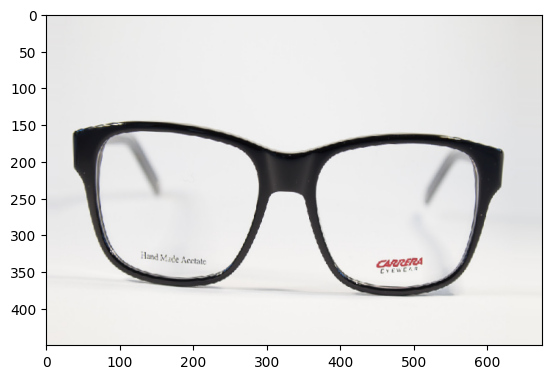

0.0


In [ ]:
# Сгенерированное фото из train_generator

for  imgs, labels in train_generator:
  plt.imshow(imgs[0].astype("uint8"))
  plt.show()
  print(labels[0])                    # печать значения метки для первого изображения
  # print(imgs[0])                    # печать массива первого изображения
  break

Проверяем работу генератора

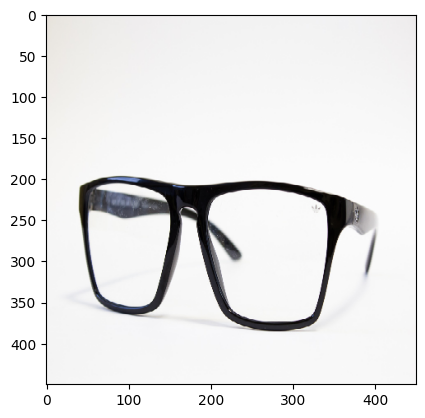

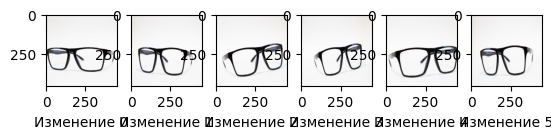

In [ ]:
from tensorflow.keras.preprocessing import image

image_file_name = data_dir + '/class_1p/adidas-ah57-6056-s2-1 (3).jpg'
img = image.load_img(image_file_name, target_size=(450, 450))
plt.imshow(img)
plt.show()

# различные виды сгенерированных изображений

import matplotlib.pyplot as plt

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.subplot(1, 6, i+1)                      # изменяем параметры subplot для вывода в одну строку
    plt.xlabel("Изменение " + str(i))           # добавляем метку к изображению
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

# МОДЕЛЬ

## Архитектура сети

In [ ]:
# Создаем сверточную нейронную сеть

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Граф модели

In [ ]:
# Вывод суммарной информации о модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 673, 32)      896       
                                                                 
 activation (Activation)     (None, 448, 673, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 336, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 334, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 222, 334, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 167, 32)     0         
 2D)                                                    

## Компиляция сети

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Callback

Callback для ModelCheckpoint - для сохранение нейронной сети на каждом этапе (или лучший результат) обучения

EarlyStopping Callback - для остановки обучения нейросети при переобучении

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Сохраняем сеть на каждой эпохе
# {epoch:02d} - номер эпохи
# {val_acc:.4f} - значение аккуратности на проверочном наборе данных
# callbacks = [ModelCheckpoint('Save_models/next-accuracy-{epoch:02d}-{val_accuracy:.4f}.hdf5')]

# Сохраняем только лучший вариант сети
callbacks = [ModelCheckpoint('/content/drive/MyDrive/НетОптик/Save_models/best-accuracy.hdf5', monitor='val_accuracy', save_best_only=True)]

# Остановка обучения, если ухудшение метрик (например, val_accuracy) после 6 шагов
stopping_callback = EarlyStopping(monitor='val_accuracy', patience=6)

## Обучение модели

Обучаем модель с использованием генераторов

*   train_generator - генератор данных для обучения
*   validation_data - генератор данных для проверки

**steps_per_epoch** - сколько раз нужно обратиться модели к генератору за получением новых данных. Может быть полезным когда данных на диске очень много и простая передача по bath_size примеров может длиться очень долго

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=40,
                              verbose= 1,
                              # callbacks=callbacks,                # лучший результат
                              callbacks=[stopping_callback]       # остановка после ухудшения
                              )
print("/nОбучение остановлено на эпохе", stopping_callback.stopped_epoch)

<ipython-input-27-b0ffc05e2534>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/40
20/20 [==============================] - 88s 4s/step - loss: 5.4242 - accuracy: 0.5297 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/40
20/20 [==============================] - 79s 4s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/40
20/20 [==============================] - 93s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/40
20/20 [==============================] - 82s 4s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/40
20/20 [==============================] - 80s 4s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/40
20/20 [==============================] - 85s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/40
20/20 [==============================] - 78s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Обучение остановлено

# Сохраняем сеть
При сохранении нейронной сети в файл записываются:
- Архитектура нейросети
- Веса обученной нейросети
- Конфигурация обучения (функция ошибки, тип оптимизатора)
- Состояние оптимизатора (можно продолжить обучение с х-момента)

## Сохраняем модель

In [ ]:
print('Сохраняем сеть')

model.save('/content/drive/MyDrive/НетОптик/Save_models/net_optic.h5')

print('Сохранение сети завершено')

Сохраняем сеть
Сохранение сети завершено


In [ ]:
# Сохранение весов в файл h5
model.save_weights("/content/drive/MyDrive/НетОптик/Save_models/net_optic_w.h5")

## Загрузка модели

In [ ]:
from tensorflow.keras.models import load_model

print('Загружаем сеть')

# Загружаем модель из файла
model = load_model("/content/drive/MyDrive/НетОптик/Save_models/net_optic.h5")

print('Загрузка сети завершена')

Загружаем сеть
Загрузка сети завершена


In [ ]:
# Загрузка весов в модель
model.load_weights("/content/drive/MyDrive/НетОптик/Save_models/net_optic_w.h5")

# РАСПОЗНОВАНИЕ

Статистика для Test выборки

In [ ]:
# Для работы с файлами
import os

# Папка с папками картинок, рассортированных по категориям
TEST_IMAGE_PATH = '/content/drive/MyDrive/НетОптик/Dataset/test'
print('Список подпапок:', os.listdir(TEST_IMAGE_PATH), '\n')

# Определение списка имен классов
TEST_CLASS_LIST = sorted(os.listdir(TEST_IMAGE_PATH))

# Определение количества классов
TEST_CLASS_COUNT = len(TEST_CLASS_LIST)

# Получения списка файлов для каждого класса
test_samples = 0
for test_name_folder in TEST_CLASS_LIST:
  test_file_name = os.listdir(f'{TEST_IMAGE_PATH}/{test_name_folder}/')
  print(f'В папке "{test_name_folder}" всего {len(test_file_name)} картинок:\n{test_file_name}\n')
  test_samples = test_samples + len(test_file_name)
print('test_samples = ', test_samples)

Список подпапок: ['class_1p', 'class_2m'] 

В папке "class_1p" всего 18 картинок:
['gucci-gg3625-6f4-s2-2 (2).jpg', 'gucci-gg3625-6f7-s2-2 (2).jpg', 'gucci-gg3625-6f7-s2-1 (3).jpg', 'gucci-gg3627-cs2-s2-2 (2).jpg', 'gucci-gg3627-cs2-s2-1 (3).jpg', 'gucci-gg3629-dxz-s2-2 (2).jpg', 'gucci-gg3629-dxz-s2-1 (3).jpg', 'gucci-gg3629-dxf-s2-2 (2).jpg', 'gucci-gg3629-dxf-s2-1 (3).jpg', 'gucci-gg3648-iee-s2-2 (2).jpg', 'gucci-gg3648-iee-s2-1 (3).jpg', 'hickmann-hiy6000-p02-s2-2 (1).jpg', 'hickmann-hiy6000-p02-s2-1 (2).jpg', 'hot-wheels-hwbb001-blk-s2-1 (1).jpg', 'hot-wheels-hwbb001-blk-s2-2 (2).jpg', 'hot-wheels-hwbb004-grey-s2-2 (2).jpg', 'hot-wheels-hwbb004-grey-s2-1 (1).jpg', 'hot-wheels-hwcl003-blk-s2-2 (3).jpg']

В папке "class_2m" всего 18 картинок:
['harley-davidson-hd0769-002-s2-2 (1).jpg', 'harley-davidson-hd0769-002-s2-2 (2).jpg', 'harley-davidson-hd0769-002-s2-1 (3).jpg', 'harley-davidson-hd0770-002-s2-2 (1).jpg', 'harley-davidson-hd0770-002-s2-2 (2).jpg', 'harley-davidson-hd0770-002-

Accuracy (точность работы модели) - это отношение правильных ответов модели к общему числу примеров

Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate(test_generator, steps=test_samples // batch_size)
print("\nTest_accuracy (точность работы модели) на тестовых данных: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 3s 3s/step - loss: 0.6931 - accuracy: 0.5000

Test_accuracy (точность работы модели) на тестовых данных: 50.00%


# МОДЕЛЬ c VGG16

# Перенос обучения
Предварително обученные сети для обработки изображений:
1. VGG16 (Very Deep Convolutional Networks for Large-Scale Image Recognition)
2. ResNet (Residual Neural Network)
3. InceptionNet (Inception V1, V2, V3, V4, Inception-ResNet)
4. MobileNet (Efficient Convolutional Neural Networks for Mobile Vision Applications)
5. DenseNet (Densely Connected Convolutional Networks)
6. AlexNet (Convolutional Neural Networks for Image Classification)
7. Xception (Extreme Inception)
8. EfficientNet (Efficient Convolutional Neural Networks)

 которые можно использовать в задачах классификации, распознавания объектов и других задачах обработки изображений.

## Загрузка библиотек для модели

In [ ]:
from keras.applications import VGG16

# # Загрузка модели VGG16 без весов ImageNet
# model = VGG16(weights=None, include_top=True)

## Обученная VGG16

Загружаем предварительно обученную нейронную сеть VGG16

In [ ]:
# Загружаем предварительно обученную нейронную сеть
vgg16_net = VGG16(weights='imagenet',                         # признаки из набора данных "ImageNet"
                  include_top=False,                          # отключаем часть "классификация", оставляем только "сверточную часть"
                  input_shape=(img_width, img_height, 3))     # размер тензора входных изображений

# "Замораживаем" веса предварительно обученной нейронной сети VGG16 (сверточную часть обучать не будем)
vgg16_net.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450, 675, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 450, 675, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 450, 675, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 225, 337, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 225, 337, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 225, 337, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 112, 168, 128)     0     

*   Кол-во параметров:  14,714,688
*   Кол-во параметров обучаем: 0
*   Кол-во параметров НЕ обучаем: 14,714,688


## Составная сеть

Создаем составную нейронную сеть на основе VGG16

In [ ]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
# Добавляем слои, для классификации
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# Вывод архитектуры
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 14, 21, 512)       14714688  
                                                                 
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               38535424  
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

*   Кол-во параметров:  53,250,369 (14,714,688 + 38,535,424 + 257)
*   Кол-во параметров обучаем: 38,535,681 (38,535,424 + 257)
*   Кол-во параметров НЕ обучаем: 14,714,688

## Компиляция (VGG16)

Компиляция составной нейронной сети

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),         # должна быть низкой, чтобы алгоритм обучения сошелся
              metrics=['accuracy'])

Обучаем составную модель с использованием генераторов fit_generator

*   train_generator - генератор данных для обучения
*   validation_data - генератор данных для проверки

## Callback (VGG16)

Callback для ModelCheckpoint - для сохранение нейронной сети на каждом этапе (или лучший результат) обучения

EarlyStopping Callback - для остановки обучения нейросети при переобучении

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Сохраняем сеть на каждой эпохе
# {epoch:02d} - номер эпохи
# {val_acc:.4f} - значение аккуратности на проверочном наборе данных
# callbacks = [ModelCheckpoint('Save_models/next-accuracy-{epoch:02d}-{val_accuracy:.4f}.hdf5')]

# Сохраняем только лучший вариант сети
callbacks = [ModelCheckpoint('/content/drive/MyDrive/НетОптик/Save_models/best-accuracy_vgg16.hdf5', monitor='val_accuracy', save_best_only=True)]

# остановка если ухудшение после 5 шагов
stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5)

EarlyStopping Callback - для остановки обучения нейросети при переобучении

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5) # остановка если ухудшение после 5 шагов

## Обучение (VGG16)

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=5,
                              verbose= 1,
                              callbacks=callbacks,                # лучший результат
                              # callbacks=[stopping_callback]     # остановка после ухудшения
                              )

<ipython-input-41-67b5f0f90d2f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
20/20 [==============================] - 106s 5s/step - loss: 3.8614 - accuracy: 0.6062 - val_loss: 1.0680 - val_accuracy: 0.8250
Epoch 2/5
20/20 [==============================] - 101s 5s/step - loss: 1.0603 - accuracy: 0.8984 - val_loss: 0.3176 - val_accuracy: 0.9625
Epoch 3/5
20/20 [==============================] - 97s 5s/step - loss: 0.5634 - accuracy: 0.9156 - val_loss: 0.1745 - val_accuracy: 0.9875
Epoch 4/5
20/20 [==============================] - 87s 4s/step - loss: 0.4252 - accuracy: 0.9406 - val_loss: 0.1090 - val_accuracy: 0.9688
Epoch 5/5
20/20 [==============================] - 83s 4s/step - loss: 0.1188 - accuracy: 0.9688 - val_loss: 0.0671 - val_accuracy: 0.9875


Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate(test_generator, steps=test_samples // batch_size)
print("\nTest_accuracy (точность работы модели) на тестовых данных: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 142s 142s/step - loss: 1.1962e-04 - accuracy: 1.0000

Test_accuracy (точность работы модели) на тестовых данных: 100.00%


# Сохраняем сеть с VGG16

## Сохраняем модель

In [ ]:
print('Сохраняем сеть')

model.save('/content/drive/MyDrive/НетОптик/Save_models/net_optic_VGG16.h5')

print('Сохранение сети завершено')

Сохраняем сеть
Сохранение сети завершено


In [ ]:
# Сохранение весов в файл h5
model.save_weights("/content/drive/MyDrive/НетОптик/Save_models/net_optic_w_VGG16.h5")

## Загрузка модели

In [ ]:
from tensorflow.keras.models import load_model

print('Загружаем сеть')

# Загружаем модель из файла
model = load_model("/content/drive/MyDrive/НетОптик/Save_models/net_optic_VGG16.h5")

print('Загрузка сети завершена')

Загружаем сеть
Загрузка сети завершена


In [ ]:
# Загрузка весов в модель
model.load_weights("/content/drive/MyDrive/НетОптик/Save_models/net_optic_w_VGG16.h5")

# ГРАФИКИ

## Графики потерь и точности

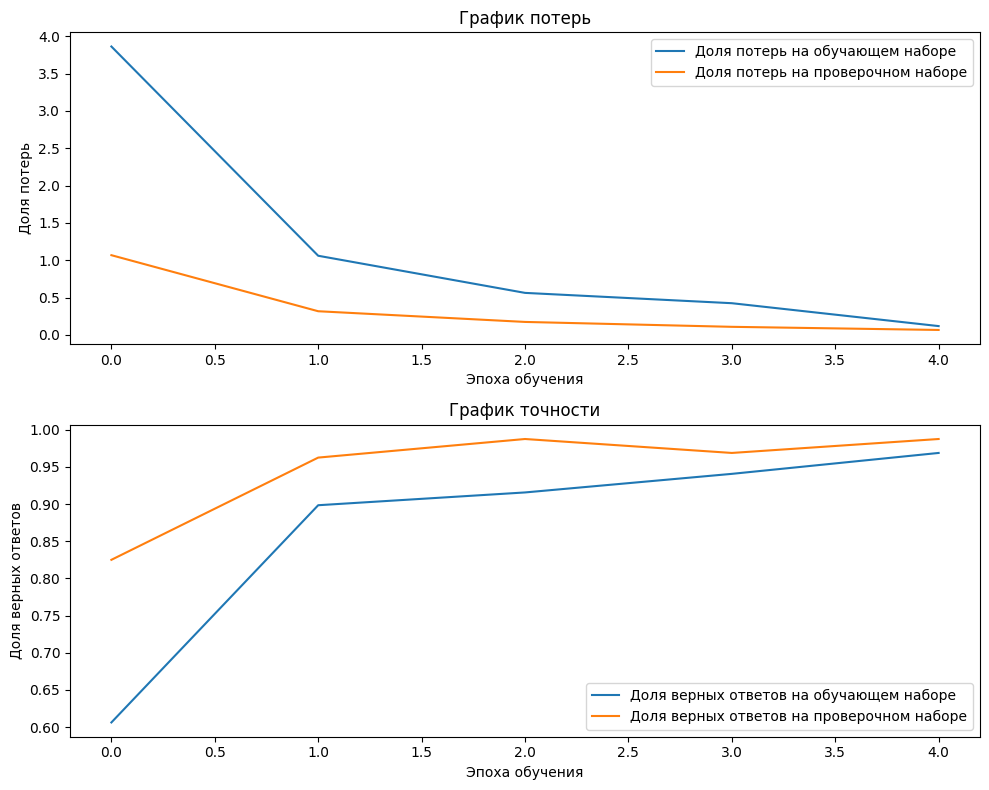

In [ ]:
import matplotlib.pyplot as plt

# Получите значения потерь и точности из истории обучения
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Создайте график с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# График потерь
ax1.plot(train_loss, label='Доля потерь на обучающем наборе')
ax1.plot(val_loss, label='Доля потерь на проверочном наборе')
ax1.legend()
ax1.set_title('График потерь')
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля потерь')

# График точности
ax2.plot(train_acc, label='Доля верных ответов на обучающем наборе')
ax2.plot(val_acc, label='Доля верных ответов на проверочном наборе')
ax2.legend()
ax2.set_title('График точности')
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Доля верных ответов')

# Отобразите графики
plt.tight_layout()
plt.show()

## График confusion_matrix

2/2 [==============================] - 4s 723ms/step


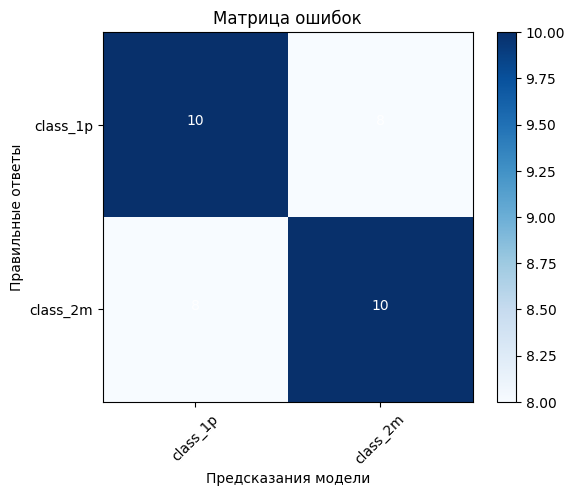

In [ ]:
import numpy as np
# Импорт метода построения confusion_matrix
from sklearn.metrics import confusion_matrix
# Импорт метода визуализации confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Получение предсказанных значений модели для тестового набора данных
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()                    # округление до целых чисел и преобразование в одномерный массив

# Получение истинных значений тестового набора данных
y_true = test_generator.classes

# Построение confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Отображение confusion matrix с изображением значений
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.colorbar()
tick_marks = np.arange(len(CLASS_LIST))
plt.xticks(tick_marks, CLASS_LIST, rotation=45)
plt.yticks(tick_marks, CLASS_LIST)
plt.xlabel('Предсказания модели')
plt.ylabel('Правильные ответы')

# Нанесение значений в каждую ячейку confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

# # Визуализация матрицы ошибок
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Пластик', 'Метал'])
# disp.plot()
# plt.show()

Ось x - предсказания модели Ось y - правильные ответы

Пластик - class_1p |||| Метал - class_2m

Получаем:

10 раз модель предсказала пластик (правильный ответ пластик)

0 раза модель предсказала метал (правильный ответ пластик)

0 раз модель предсказала пластик (правильный ответ метал)

10 раза модель предсказала метал (правильный ответ метал)

# КЛОНИРОВАНИЕ изображений

## Аугментация. Способ 1

In [ ]:
import os
import numpy as np
import cv2

generated_images_count = 0


for i in range(len(test_generator)):
    batch = test_generator[i]  # Генерация очередной порции изображений
    images = batch[0]
    labels = batch[1]

    batch_size = images.shape[0]  # Размер текущей порции изображений

    for j in range(batch_size):
        image = images[j].astype(np.uint8)  # Преобразование изображения обратно в тип uint8
        label = labels[j]

        image_path = os.path.join("/content/drive/MyDrive/НетОптик/Dataset/test/161", f"image_{generated_images_count}.jpg")
        cv2.imwrite(image_path, image)  # Сохранение изображения в папку "22"

        generated_images_count += 1

print("Общее количество сгенерированных изображений:", generated_images_count)

## Аугментация. Способ 2

In [ ]:
desired_num_images = 35

# Создаем папку "22", если она еще не существует
output_dir = "/content/drive/MyDrive/НетОптик/Dataset/test/12"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Генерируем и сохраняем изображения
num_images = 0
for i, (images, _) in enumerate(test_generator):
    for j in range(len(images)):
        image = images[j]

        # Пример сохранения изображения в папку
        image_path = os.path.join(output_dir, f"image_{num_images}.jpg")
        cv2.imwrite(image_path, image)  # Сохранение изображения в папку "22"

        num_images += 1

    # Выходим из цикла после генерации нужного количества изображений
    if num_images >= desired_num_images:
        break

print(f"Количество сгенерированных изображений: {num_images}")